# 1. Dataset Preparation

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

**Importing dataset from make_blobs**

In [49]:
from sklearn.datasets import make_blobs

In [50]:
X, y = make_blobs(n_samples=300, centers=3, cluster_std=1.5, random_state=42)

In [51]:
dataset = pd.DataFrame(X)

In [52]:
dataset.head(3)

,0,1
0,-7.568669,-8.154876
1,-8.170247,-7.456943
2,-1.275380,7.183021


# visualizing the data points

Text(0, 0.5, 'x_2')

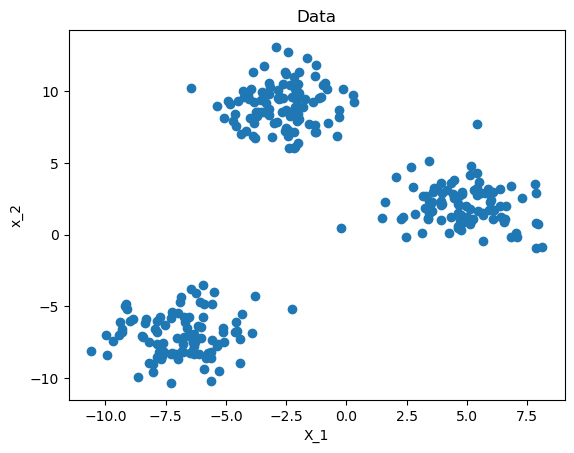

In [53]:
plt.scatter(dataset[0],dataset[1])
plt.title("Data")
plt.xlabel("X_1")
plt.ylabel("x_2")

# 2. Algorithm Implementation

In [54]:
def fun_to_create_k_clusters(dataset, k):
    """
    implementing k-means ++
    step 1. choose the first cluster randomly from the dataset
    step 2. calculate the distance from all the data points to all the culsters present
            and choose the min distance for every indiviual point to the all the clusters it is calculated
            (use euclidean distance formula)
            dist = min||x(i) - cluster(k)||^2
    step 3. calculate the probabilistical propotional to the points which we selected as min
            formula = min**2/sum(min) this will give each point probability
    step 4. select the point with the highest probability as the next cluster
    """
    
    # selecting random cluster from the dataset
    centroid = [dataset.sample().values.flatten().tolist()]
    
    # Selecting rest of the k-1 clusters using k-means ++
    
    for i in range(1,k):
        # implementing step 2 here
        distance_of_points = []
        
        for point in dataset.values:
            
            min_distance = min([np.linalg.norm(np.array(point) - np.array(j)) for j in centroid])
            distance_of_points.append(min_distance**2)
            
        # calculating probabilites for all the points based on min distance_of_points to the centroid
        # implementing step 3
        sum_of_distance_of_points = sum(distance_of_points)
        probabilities = distance_of_points / sum_of_distance_of_points
        
        
        # selecting the data point with maximum propability as next centroid
        # implementing step 4
        next_centroid = np.random.choice(len(dataset), p=probabilities)
        centroid.append(dataset.iloc[next_centroid].values.flatten().tolist())
        
    return np.array(centroid)

In [55]:
centroids = fun_to_create_k_clusters(dataset, 3)
print(centroids)

[[ 5.85917201  2.91761295]
 [-1.06413343  9.63345752]
 [-8.43549642 -7.16561761]]


In [56]:
type(centroids)

numpy.ndarray

# Ploting the data points and the k - clusters after finding them

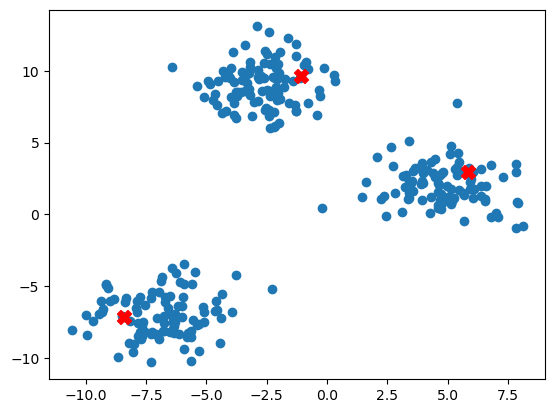

In [57]:
plt.scatter(dataset[0],dataset[1])
plt.scatter(centroids[:,0],centroids[:,1], marker = 'X', s = 100, color = 'r')

In [58]:
def assign_cluster(dataset, centroids):
    assignments = []
    
    for point in dataset.values:
        dist_to_centroids = []
        
        for centroid in centroids:
            distance = np.linalg.norm(np.array(point) - np.array(centroid))
            dist_to_centroids.append(distance)
        assign = np.argmin(dist_to_centroids)
        assignments.append(assign)
    return assignments
        

In [59]:
assignments = assign_cluster(dataset, centroids)
print(assignments)

[2, 2, 1, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 2, 0, 1, 1, 1, 1, 0, 2, 1, 2, 2, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 0, 1, 2, 0, 1, 1, 2, 0, 2, 0, 0, 2, 2, 1, 2, 0, 2, 1, 0, 1, 2, 0, 0, 2, 2, 0, 0, 2, 2, 1, 0, 2, 2, 1, 1, 2, 2, 0, 1, 0, 1, 1, 2, 1, 0, 2, 2, 1, 0, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 0, 1, 0, 1, 1, 1, 1, 1, 0, 2, 0, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 0, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 0, 0, 2, 1, 2, 1, 1, 2, 1, 0, 0, 0, 1, 0, 1, 1, 2, 0, 2, 1, 0, 0, 2, 2, 1, 1, 2, 2, 2, 1, 2, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 2, 1, 2, 0, 0, 2, 0, 1, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 1, 2, 1, 1, 0, 0, 1, 0, 2, 2, 0, 1, 1, 2, 0, 0, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 1, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 0, 2, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 1, 2, 1, 1, 1, 2, 1, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 2, 2, 2, 1, 1, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 1, 0, 0, 1, 2, 1, 0, 1, 2, 2]


In [60]:
def new_clusters(dataset, centroids, assignments, k):
    new_centroids = []
    
    for i in range(k):
        point_clusters = []
        
        for x in range(len(dataset)):
            if(assignments[x] == i):
                point_clusters.append(dataset.iloc[x].values)
        
        new_mean_of_centroid = np.mean(point_clusters , axis = 0)
        new_centroids.append(new_mean_of_centroid)
    return new_centroids

In [61]:
new_means = new_clusters(dataset, centroids, assignments, 3)

In [62]:
new_means

[array([4.80071564, 2.02930657]),
 array([-2.69525021,  9.05821161]),
 array([-6.88599409, -7.03592142])]

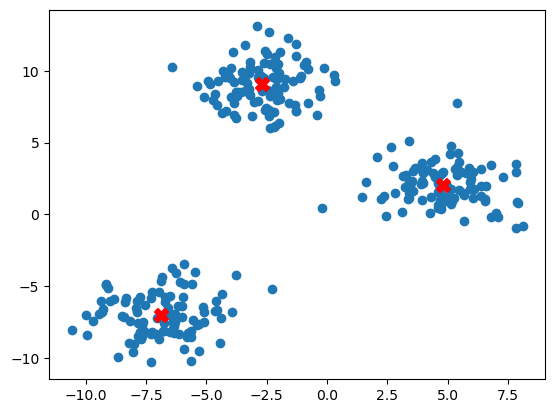

In [63]:
new_means = np.array(new_means)
plt.scatter(dataset[0],dataset[1])
plt.scatter(new_means[:,0],new_means[:,1], marker = 'X', s = 100, color = 'r')

In [64]:
def sum_of_squred_errors(dataset, centroids, assigments, k):
    errors = []
    
    for i in range(len(dataset)):
        centroid = centroids[assigments[i]]
        
        err = np.linalg.norm(np.array(dataset.iloc[i].values - np.array(centroid)))
        errors.append(err**2)
    return np.sum(errors)

In [65]:
error = sum_of_squred_errors(dataset, new_means, assignments, 3)
print(error)

1275.4339900299296


In [66]:
def k_means_clustering(dataset, k, max_iter=300, epsilon=0.00001):
    it = 0  
    all_sse = []
    
    centroids = fun_to_create_k_clusters(dataset, k)
    while it < max_iter:
        assignments = assign_cluster(dataset, centroids)
        centroids = new_clusters(dataset, centroids, assignments, k)
        sse_kmeans = sum_of_squred_errors(dataset, centroids, assignments, k)
        all_sse.append(sse_kmeans)
        
        
        if len(all_sse) >= 2 and (np.absolute(all_sse[it] - all_sse[it-1]) / all_sse[it-1]) < epsilon:
            break
        
        it += 1  
    
    return (assignments, centroids, all_sse, it)

# 3. Evaluation: 

# K = 3

In [67]:
result_1 = k_means_clustering(dataset, 3)

In [68]:
result_1[0]

[1,
 1,
 2,
 0,
 1,
 0,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 1,
 2,
 1,
 0,
 2,
 2,
 2,
 2,
 0,
 1,
 2,
 1,
 1,
 0,
 0,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 0,
 1,
 0,
 0,
 2,
 1,
 0,
 2,
 2,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 2,
 1,
 0,
 1,
 2,
 0,
 2,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 2,
 0,
 1,
 1,
 2,
 2,
 1,
 1,
 0,
 2,
 0,
 2,
 2,
 1,
 2,
 0,
 1,
 1,
 2,
 0,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 1,
 0,
 2,
 2,
 2,
 2,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 1,
 0,
 1,
 2,
 0,
 0,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 1,
 2,
 1,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 1,
 2,
 2,
 0,
 0,
 2,
 0,
 1,
 1,
 0,
 2,
 2,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 0,
 1,
 1,
 2,
 0,
 1,
 1,
 0,
 2,
 2,
 1,
 2,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 2,
 1,
 0,
 0,
 0,
 1,
 0,


In [69]:
result_1[1]

[array([4.80071564, 2.02930657]),
 array([-6.88599409, -7.03592142]),
 array([-2.69525021,  9.05821161])]

In [70]:
result_1[2]

[1382.7304662302442, 1275.4339900299296, 1275.4339900299296]

In [71]:
result_1[3]

2

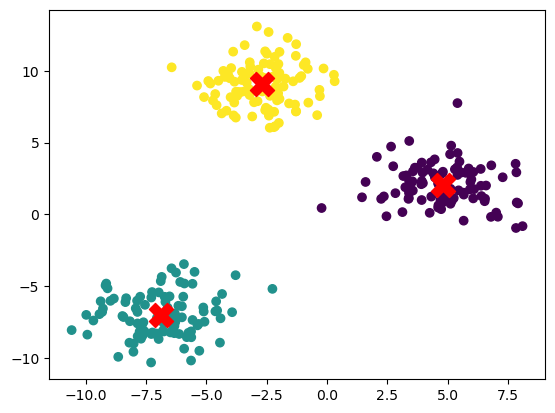

In [72]:
centroid_x = np.array(result_1[1])[:,0]
centroid_y = np.array(result_1[1])[:,1]
x = dataset.iloc[:,0].values
y = dataset.iloc[:,1].values
assignments = result_1[0]
plt.scatter(x, y, c=assignments)
plt.scatter(centroid_x, centroid_y, c ='r',s=300, marker = 'X')

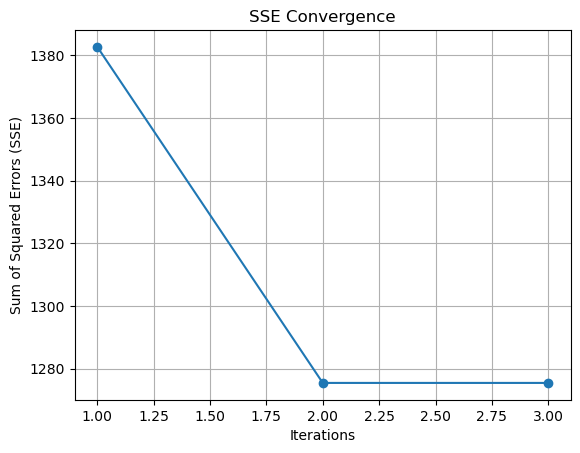

In [73]:
assignments, centroids, all_sse, it = result_1
plt.plot(range(1, it+2), all_sse, marker='o') 
plt.xlabel('Iterations')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('SSE Convergence')
plt.grid(True)
plt.show()


# k = 2

In [74]:
result_2 = k_means_clustering(dataset, 2)

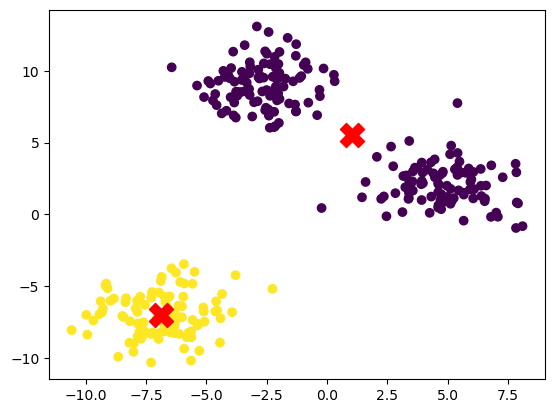

In [75]:
centroid_x = np.array(result_2[1])[:,0]
centroid_y = np.array(result_2[1])[:,1]
x = dataset.iloc[:,0].values
y = dataset.iloc[:,1].values
assignments = result_2[0]
plt.scatter(x, y, c=assignments)
plt.scatter(centroid_x, centroid_y, c ='r',s=300, marker = 'X')

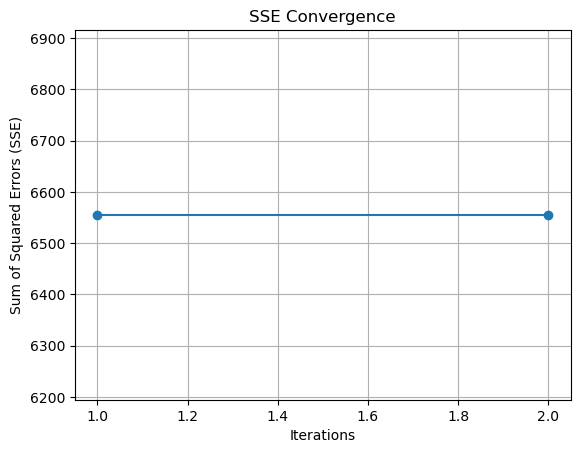

In [76]:
assignments, centroids, all_sse, it = result_2
plt.plot(range(1, it+2), all_sse, marker='o') 
plt.xlabel('Iterations')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('SSE Convergence')
plt.grid(True)
plt.show()

# K = 4

In [77]:
result_3 = k_means_clustering(dataset, 4)

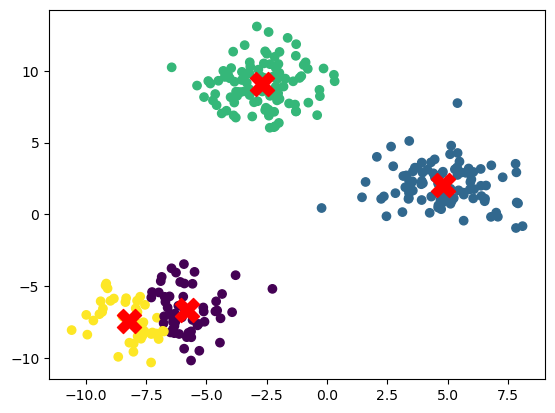

In [78]:
centroid_x = np.array(result_3[1])[:,0]
centroid_y = np.array(result_3[1])[:,1]
x = dataset.iloc[:,0].values
y = dataset.iloc[:,1].values
assignments = result_3[0]
plt.scatter(x, y, c=assignments)
plt.scatter(centroid_x, centroid_y, c ='r',s=300, marker = 'X')

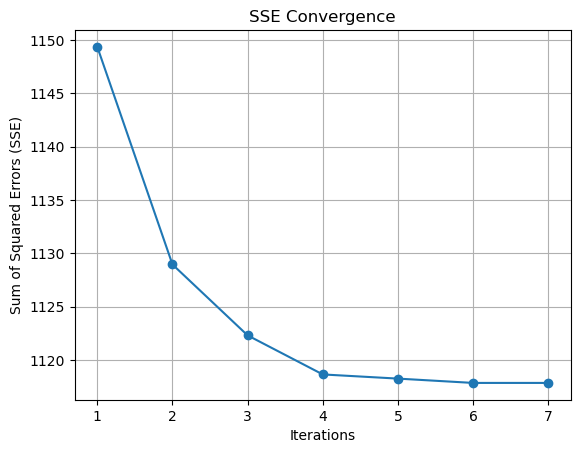

In [79]:
assignments, centroids, all_sse, it = result_3
plt.plot(range(1, it+2), all_sse, marker='o') 
plt.xlabel('Iterations')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('SSE Convergence')
plt.grid(True)
plt.show()

# K = 5

In [80]:
result_4 = k_means_clustering(dataset, 5)

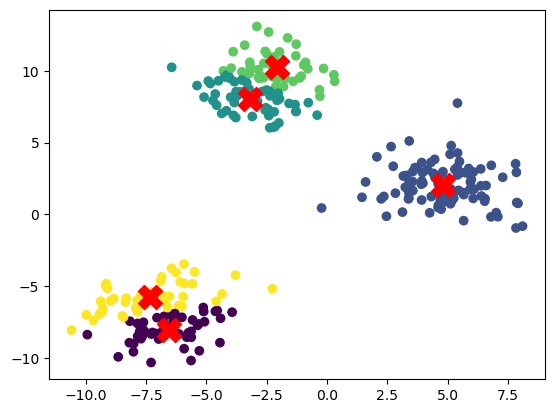

In [81]:
centroid_x = np.array(result_4[1])[:,0]
centroid_y = np.array(result_4[1])[:,1]
x = dataset.iloc[:,0].values
y = dataset.iloc[:,1].values
assignments = result_4[0]
plt.scatter(x, y, c=assignments)
plt.scatter(centroid_x, centroid_y, c ='r',s=300, marker = 'X')

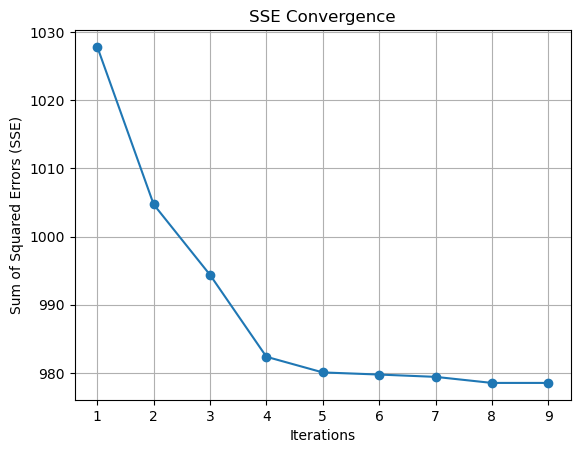

In [82]:
assignments, centroids, all_sse, it = result_4
plt.plot(range(1, it+2), all_sse, marker='o')  
plt.xlabel('Iterations')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('SSE Convergence')
plt.grid(True)
plt.show()